In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:


print("Upload File")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Read Excel file
df = pd.read_csv(filename)

print("Dataset loaded successfully.")



Upload File


Saving xy_data.csv to xy_data (3).csv
Dataset loaded successfully.


In [ ]:
print(df.head())
print(df.info())
print(df.describe())



            x          y
0   88.364456  57.784378
1   74.283936  54.406780
2   60.256474  46.311462
3   82.134370  57.717567
4  101.036390  67.849340
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1500 non-null   float64
 1   y       1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB
None
                 x            y
count  1500.000000  1500.000000
mean     83.713931    58.263519
std      13.697157     7.696524
min      59.657204    46.032295
25%      72.282910    51.124211
50%      84.710995    57.681288
75%      93.368257    66.138374
max     109.231520    69.685510


In [ ]:
# Assuming data columns are x and y
x_obs = df['x'].values
y_obs = df['y'].values
n_pts = len(x_obs)

# Uniformly space t for 6 < t < 60
t_vals = np.linspace(6, 60, n_pts)

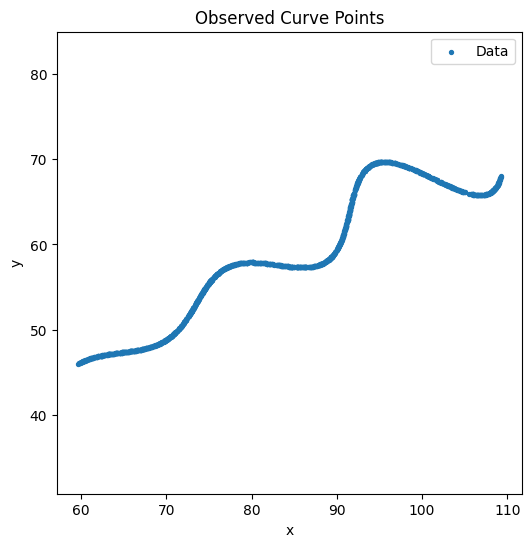

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(x_obs, y_obs, label='Data', s=8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Observed Curve Points')
plt.legend()
plt.axis('equal')
plt.show()


In [ ]:
def parametric_xy(t, theta_deg, M, X):
    theta = np.deg2rad(theta_deg)
    x = t * np.cos(theta) - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta) + X
    y = 42 + t * np.sin(theta) + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta)
    return x, y


In [ ]:
def l1_distance(params, t, x_true, y_true):
    theta_deg, M, X = params
    x_pred, y_pred = parametric_xy(t, theta_deg, M, X)
    return np.mean(np.abs(x_pred - x_true) + np.abs(y_pred - y_true))


In [ ]:
from scipy.optimize import differential_evolution

# Parameter bounds (theta, M, X)
bounds = [(0, 50), (-0.05, 0.05), (0, 100)]

result = differential_evolution(
    l1_distance, bounds, args=(t_vals, x_obs, y_obs),
    strategy='best1bin', tol=1e-7, seed=42, disp=True
)

theta_opt, M_opt, X_opt = result.x
best_l1 = result.fun
print(f"Optimal parameters:\nTheta (deg): {theta_opt}\nM: {M_opt}\nX: {X_opt}")
print("Final L1 distance:", best_l1)


differential_evolution step 1: f(x)= 25.328410084397454
differential_evolution step 2: f(x)= 25.328410084397454
differential_evolution step 3: f(x)= 25.328410084397454
differential_evolution step 4: f(x)= 25.328410084397454
differential_evolution step 5: f(x)= 25.328410084397454
differential_evolution step 6: f(x)= 25.29932852555178
differential_evolution step 7: f(x)= 25.2887708788987
differential_evolution step 8: f(x)= 25.25334407318343
differential_evolution step 9: f(x)= 25.25334407318343
differential_evolution step 10: f(x)= 25.24708257740348
differential_evolution step 11: f(x)= 25.244815818077083
differential_evolution step 12: f(x)= 25.24434420151804
differential_evolution step 13: f(x)= 25.24393316156105
differential_evolution step 14: f(x)= 25.243724559537252
differential_evolution step 15: f(x)= 25.243724559537252
differential_evolution step 16: f(x)= 25.243684834356404
differential_evolution step 17: f(x)= 25.243509689702567
differential_evolution step 18: f(x)= 25.2435096

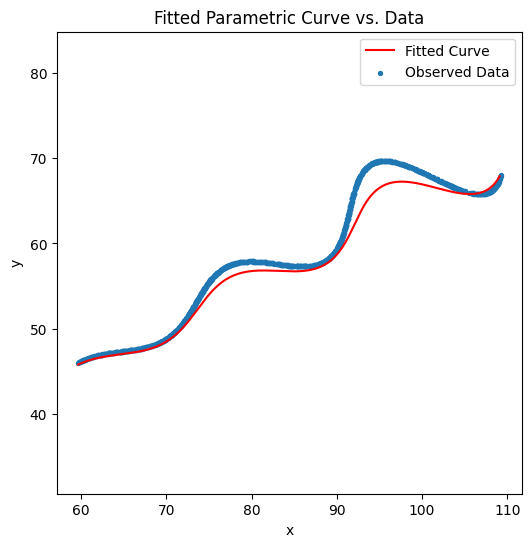

In [ ]:
x_fit, y_fit = parametric_xy(t_vals, theta_opt, M_opt, X_opt)

plt.figure(figsize=(6, 6))
plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
plt.scatter(x_obs, y_obs, label='Observed Data', s=8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Parametric Curve vs. Data')
plt.legend()
plt.axis('equal')
plt.show()


In [ ]:
import math

# Equation in LaTeX and Desmos format
print("LaTeX representation:")
print(r"x = \left( t \cos({:.4f}) - e^{{ {:.4f} |t| }} \sin(0.3 t) \sin({:.4f}) + {:.4f} \right)".format(
    math.radians(theta_opt), M_opt, math.radians(theta_opt), X_opt))
print(r"y = \left( 42 + t \sin({:.4f}) + e^{{ {:.4f} |t| }} \sin(0.3 t) \cos({:.4f}) \right)".format(
    math.radians(theta_opt), M_opt, math.radians(theta_opt)))

print("\nDesmos representation (use radians):")
print("( t*cos({:.4f}) - exp({:.4f}*abs(t))*sin(0.3*t)*sin({:.4f}) + {:.4f}, 42 + t*sin({:.4f}) + exp({:.4f}*abs(t))*sin(0.3*t)*cos({:.4f}) )".format(
    math.radians(theta_opt), M_opt, math.radians(theta_opt), X_opt,
    math.radians(theta_opt), M_opt, math.radians(theta_opt)))


LaTeX representation:
x = \left( t \cos(0.4908) - e^{ 0.0214 |t| } \sin(0.3 t) \sin(0.4908) + 54.8997 \right)
y = \left( 42 + t \sin(0.4908) + e^{ 0.0214 |t| } \sin(0.3 t) \cos(0.4908) \right)

Desmos representation (use radians):
( t*cos(0.4908) - exp(0.0214*abs(t))*sin(0.3*t)*sin(0.4908) + 54.8997, 42 + t*sin(0.4908) + exp(0.0214*abs(t))*sin(0.3*t)*cos(0.4908) )
